In [1]:
import numpy as np
import torch
import torch.nn as nn
import models.lstm_scene_to_scene02 as clstm 
import matplotlib.pyplot as plt


In [2]:
model = clstm.LSTMSceneToScene02(hidden_dim=128)

state_dict = torch.load(r"C:\Users\morit\OneDrive\Desktop\adlr_model\scene_convlstm_study01_e5.pt", map_location="cpu")
model.load_state_dict(state_dict['model_state_dict'])

model.eval()



LSTMSceneToScene02(
  (convLSTM): StackedConvLSTM(
    (layers): ModuleList(
      (0): ConvLSTM(
        (cell): ConvLSTMCell(
          (conv): Conv2d(129, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (1): ConvLSTM(
        (cell): ConvLSTMCell(
          (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
    )
  )
  (decoder): Conv2d(128, 1, kernel_size=(1, 1), stride=(1, 1))
  (activation): Sigmoid()
)

In [3]:
data = np.load(r"C:\Users\morit\OneDrive\Desktop\adlr_model\dynamic_scenes2d_motionv01_64_10_1000_100_vel0_pt09.npy")

In [15]:
data.shape
frames = torch.Tensor(data[4][:5])
frames.shape


torch.Size([5, 64, 64])

In [16]:
image = model.forward_multi_step(frames.unsqueeze(0), 10).detach().numpy()

In [6]:
image.shape

(1, 10, 64, 64)

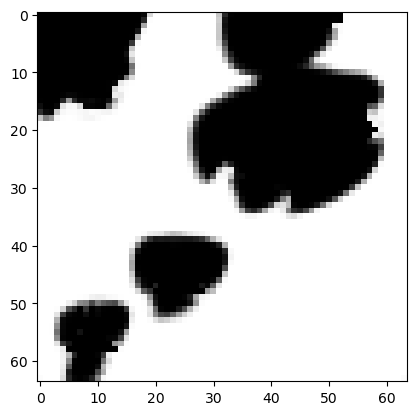

In [17]:
plt.imshow(image[0][8], cmap='binary')

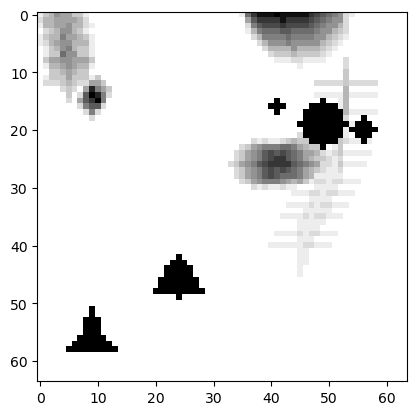

In [18]:
plt.imshow(np.sum(data[4][:14], axis = 0), cmap='binary')

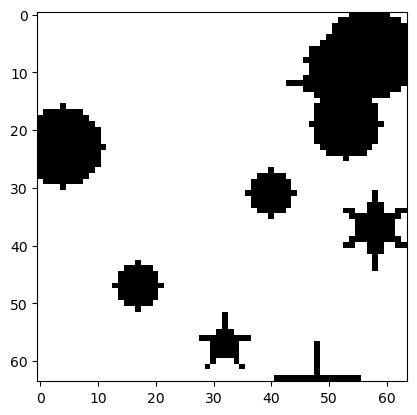

In [8]:
plt.imshow(data[0][14], cmap='binary')